## 1) Beginning the Journey
---

#### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#### Importing and visualizing the training set

In [2]:
def get_info(dataframe = pd.core.frame.DataFrame):
    print('These are the vairables in your DataFrame: \n----------------------------------------------------- \n')
    
    # Empty list for 'Numerical' and 'Categorical' variables
    numerical   = []
    categorical = []
    
    # Print variables, variable type, missing values, and unique values for Categorical variables
    for column in dataframe.columns:
        if dataframe[column].dtype in ['int64','float64']:
            numerical.append(str(column))
        else:
            categorical.append(str(column))
        
    print("Numerical variables in DataFrame: \n")
    [print("{} variable has {} missing values.".format(col,dataframe[col].isna().sum())) for col in numerical]
    print("\n")
    
    if len(categorical) > 0:
        print("Categorical variables in DataFrame: \n")
        [print("{} variable has {} unique values and {} missing values."
           .format(col,dataframe[col].nunique(),dataframe[col].isna().sum())) for col in categorical]
    else:
        print("There are no Categorical variables in DataFrame")

In [3]:
df_train = pd.read_csv('train.csv')
# Dataframe to create labels and observe the real information
x_train_obs = df_train.copy()
# Dataframe that will contain the training set
x_train = df_train.copy()


# Dataframe that will contain the test set (csv file from kaggle)
# This datset will have the same transformations applied to x_train in order to predict passenger survival
x_test = pd.read_csv('test.csv')
x_test_copy = x_test.copy()

In [4]:
x_train_obs.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
get_info(x_train_obs)

These are the vairables in your DataFrame: 
----------------------------------------------------- 

Numerical variables in DataFrame: 

PassengerId variable has 0 missing values.
Survived variable has 0 missing values.
Pclass variable has 0 missing values.
Age variable has 177 missing values.
SibSp variable has 0 missing values.
Parch variable has 0 missing values.
Fare variable has 0 missing values.


Categorical variables in DataFrame: 

Name variable has 891 unique values and 0 missing values.
Sex variable has 2 unique values and 0 missing values.
Ticket variable has 681 unique values and 0 missing values.
Cabin variable has 147 unique values and 687 missing values.
Embarked variable has 3 unique values and 2 missing values.


In [6]:
x_train_obs.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### Variables Age, Cabin, and Embarked have missing values
#### From the categorical variables, it seems like  Ticket and Cabin will be dropped due to their high cardinality

## 2) Dataset observations and insights
---

In [7]:
x_train_obs.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


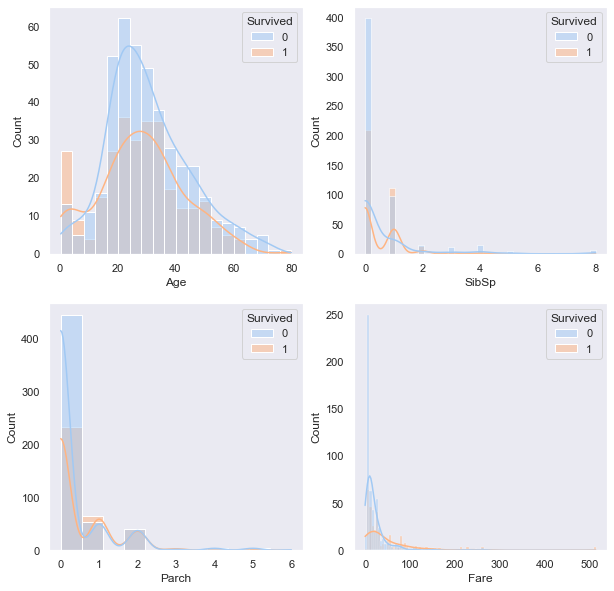

In [8]:
# Numerical variables in the dataset

num_obs = x_train_obs.select_dtypes(exclude=['object'])
sns.set_theme(style="dark", palette="pastel")
graph_num = num_obs

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(graph_num, x="Age", hue='Survived', kde=True, color="green", ax=axs[0, 0])
sns.histplot(graph_num, x="SibSp", hue='Survived', kde=True, color="red", ax=axs[0, 1])
sns.histplot(graph_num, x="Parch", hue='Survived', kde=True, color="purple", ax=axs[1, 0])
sns.histplot(graph_num, x="Fare", hue='Survived', kde=True,color="olive", ax=axs[1, 1])

plt.show()

In [9]:
# Categorical variables

cat_obs = x_train_obs[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

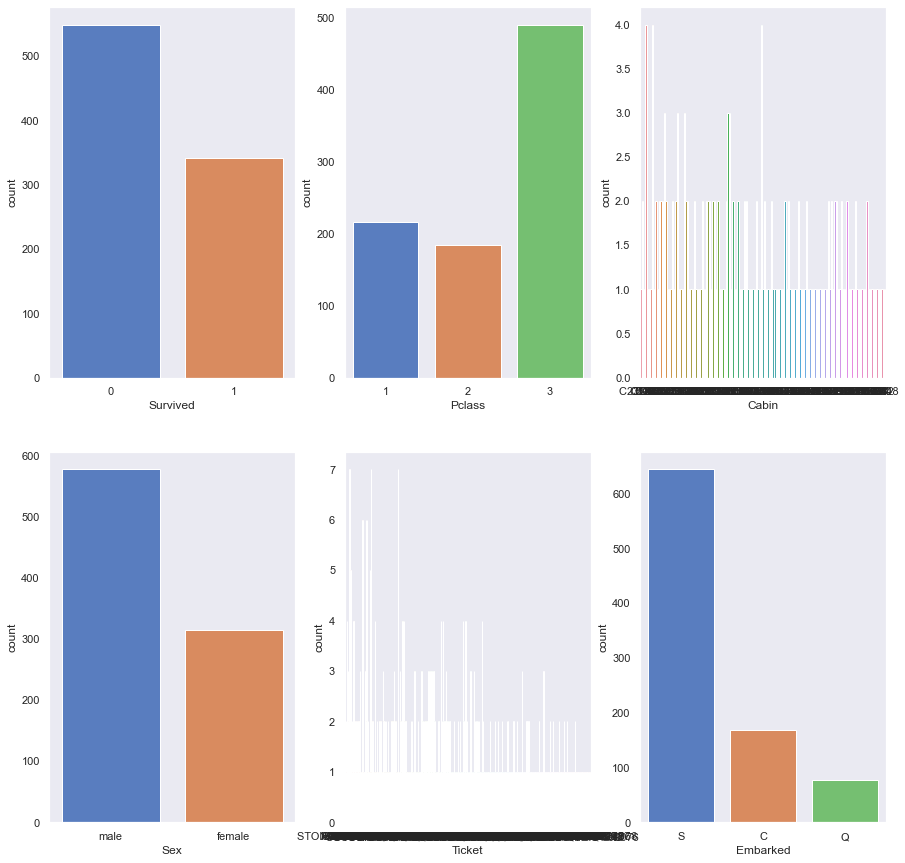

In [10]:
sns.set_theme(style="dark", palette="muted")
graph_cat = cat_obs

fig, axs = plt.subplots(2, 3, figsize=(15, 15))

sns.countplot(x='Survived', data=graph_cat, ax=axs[0,0]) #x='Survived',data =y, ax=axs[0,0]
sns.countplot(x="Pclass", data=graph_cat,ax=axs[0, 1])
sns.countplot(x="Sex", data=graph_cat, ax=axs[1, 0])
sns.countplot(x="Ticket", data=graph_cat, ax=axs[1, 1])
sns.countplot(x="Cabin", data=graph_cat, ax=axs[0, 2])
sns.countplot(x="Embarked", data=graph_cat, ax=axs[1, 2])

plt.show()

#### Survived variable:

In [11]:
print("{} passengers survived, and {} didn't".format(((x_train_obs['Survived']==1).sum()),((x_train_obs['Survived']==0).sum())))

342 passengers survived, and 549 didn't


#### Age variable:

In [12]:
# According to 'https://help.healthycities.org/hc/en-us/articles/219556208-How-are-the-different-age-groups-defined-':
# Infants are younger than 1 year
# Children are between 1 and 11 years
# Teens are between 12 and 17 years
# Adults are between 18 and 64 years
# Older adults are older than 65 years

def age_label(row):
    if row['Age']<1:
        return 'Infant'
    elif row['Age']>=1 and row['Age']<=11:
        return 'Children'
    elif row['Age']>=12 and row['Age']<=17:
        return 'Teen'
    elif row['Age']>=18 and row['Age']<=64:
        return 'Adult'
    elif row['Age']>=65:
        return 'Older Adult'
    else:
        return 'Unknown'

In [13]:
x_train_obs['Age_Class'] = x_train_obs.apply(lambda row: age_label(row), axis=1)

In [14]:
x_train_obs.groupby(['Age_Class']).sum()['Survived']

Age_Class
Adult          228
Children        32
Infant           7
Older Adult      1
Teen            22
Unknown         52
Name: Survived, dtype: int64

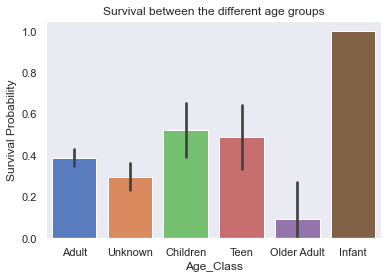

In [15]:
sns.barplot(x='Age_Class',y='Survived',data=x_train_obs)
plt.ylabel("Survival Probability")
plt.title("Survival between the different age groups")
plt.show()

#### SibSp and Parch variables are just relatives aboard, so I will combine them together
#### Relatives variable:

In [16]:
def relative(row):
    return row['SibSp'] + row['Parch']

In [17]:
x_train_obs['Relatives'] = x_train_obs.apply(lambda row: relative(row), axis=1)
x_train['Relatives'] = x_train.apply(lambda row: relative(row), axis=1)
x_test['Relatives'] = x_test.apply(lambda row: relative(row), axis=1)

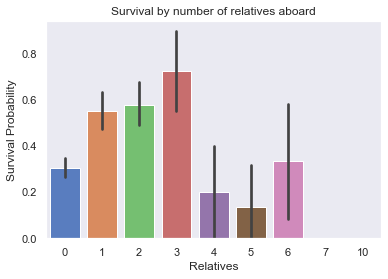

In [18]:
sns.barplot(x='Relatives', y='Survived', data=x_train_obs)
plt.ylabel("Survival Probability")
plt.title("Survival by number of relatives aboard")
plt.show()

#### Fare variable:

In [19]:
x_train_obs['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [20]:
q1 = x_train_obs['Fare'].quantile(q=0.25)
q2 = x_train_obs['Fare'].quantile(q=0.50)
q3 = x_train_obs['Fare'].quantile(q=0.75)

In [21]:
# Survival probability of Fare based on quantiles

def fare_label(row):
    if row['Fare']<=q1:
        return '1 - 25%'
    elif (row['Fare']>q1) & (row['Fare']<=q2):
        return '25.1 - 50%'
    elif (row['Fare']>q2) & (row['Fare']<=q3):
        return '50.1 - 75%'
    else:
        return '75.1 - 100%'

In [22]:
x_train_obs['Fare_Label'] = x_train_obs.apply(lambda row: fare_label(row), axis=1)

In [23]:
x_train_obs.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Class,Relatives,Fare_Label
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,1,1 - 25%
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1,75.1 - 100%
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,0,25.1 - 50%
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,1,75.1 - 100%
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,0,25.1 - 50%


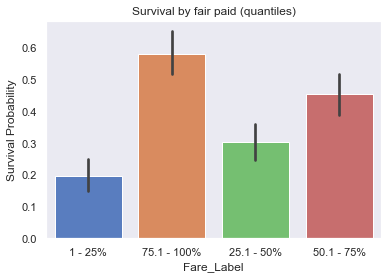

In [24]:
sns.barplot(x='Fare_Label', y='Survived', data=x_train_obs)
plt.ylabel('Survival Probability')
plt.title('Survival by fair paid (quantiles)')
plt.show()

#### Pclass variable:

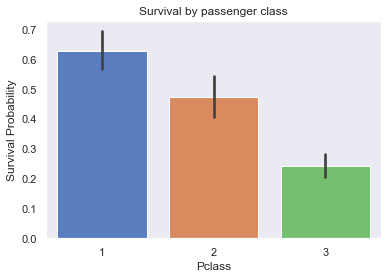

In [25]:
sns.barplot(x='Pclass', y='Survived', data=x_train_obs)
plt.ylabel('Survival Probability')
plt.title('Survival by passenger class')
plt.show()

#### Sex variable:

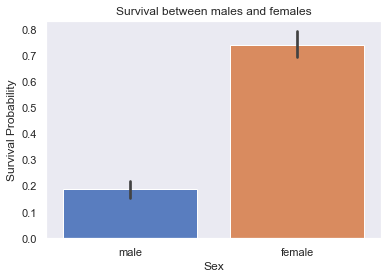

In [26]:
sns.barplot(x='Sex', y='Survived', data=x_train_obs)
plt.ylabel('Survival Probability')
plt.title('Survival between males and females')
plt.show()

In [27]:
# Total male and female passengers
survival_by_sex_total = x_train_obs['Sex'].value_counts()
# Total male and female passengers that survived
survival_by_sex = x_train_obs.groupby('Sex').sum()['Survived']
# Survival probability
survival_by_sex_percentage = (survival_by_sex/survival_by_sex_total)
survival_by_sex_percentage

female    0.742038
male      0.188908
dtype: float64

#### Embarked variable:

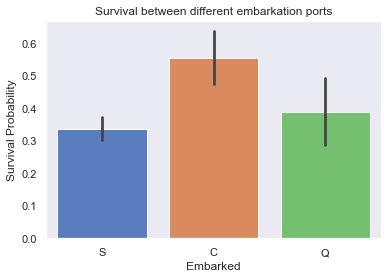

In [28]:
sns.barplot(x='Embarked', y='Survived', data=x_train_obs)
plt.ylabel('Survival Probability')
plt.title('Survival between different embarkation ports')
plt.show()

#### As mentioned before, variables ticket and cabin have way too many unique values, so they will be dropped eventually

#### Name variable:

In [29]:
# What are some common honorifics in the passenger names?

#x_train_obs['Name'].values

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [30]:
# Mr, Mrs, Miss, and Master seem to be the most frequent.
# What other honorifics make part of the names?

for name in x_train_obs['Name'].values:
    if 'Mr.' in name:
        pass
    elif 'Mrs.' in name:
        pass
    elif 'Miss' in name:
        pass
    elif 'Master' in name:
        pass
    else:
        print(name)

Uruchurtu, Don. Manuel E
Byles, Rev. Thomas Roussel Davids
Bateman, Rev. Robert James
Minahan, Dr. William Edward
Carter, Rev. Ernest Courtenay
Moraweck, Dr. Ernest
Aubart, Mme. Leontine Pauline
Pain, Dr. Alfred
Reynaldo, Ms. Encarnacion
Peuchen, Major. Arthur Godfrey
Butt, Major. Archibald Willingham
Duff Gordon, Lady. (Lucille Christiana Sutherland) ("Mrs Morgan")
Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")
Kirkland, Rev. Charles Leonard
Stahelin-Maeglin, Dr. Max
Sagesser, Mlle. Emma
Simonius-Blumer, Col. Oberst Alfons
Frauenthal, Dr. Henry William
Weir, Col. John
Mayne, Mlle. Berthe Antonine ("Mrs de Villiers")
Crosby, Capt. Edward Gifford
Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)
Brewe, Dr. Arthur Jackson
Leader, Dr. Alice (Farnham)
Reuchlin, Jonkheer. John George
Harper, Rev. John
Montvila, Rev. Juozas


#### Other not so common honorifics are:
#### Don, Rev, Dr, Mme, Ms, Major, Lady, Sir, Col, Cpt and Jonkheer. All of these correspond to adults
#### The only problem seems to be that even though there are honorifics for underage males and adult males ('Master' and 'Mr' for example), the case is not the same for underage females and adult females. 'Mrs.' are indeed adult females but 'Miss' takes both underage and adult females, which could cause issues. For this reason, 'Mrs' will be labeled as adult but 'Miss' will be labeled as other.

In [31]:
# Creating name label function based on the name honorific
def name_age(row):
    if 'Mr.' in row['Name']:
        return 'Adult'
    if 'Mrs.' in row['Name']:
        return 'Adult'
    if 'Don.' in row['Name']:
        return 'Adult'
    if 'Rev.' in row['Name']:
        return 'Adult'
    if 'Dr.' in row['Name']:
        return 'Adult'
    if 'Mme.' in row['Name']:
        return 'Adult'
    if 'Mlle.' in row['Name']:
        return 'Adult'
    if 'Ms.' in row['Name']:
        return 'Adult'
    if 'Lady.' in row['Name']:
        return 'Adult'
    if 'Sir.' in row['Name']:
        return 'Adult'
    if 'Major.' in row['Name']:
        return 'Adult'
    if 'Col.' in row['Name']:
        return 'Adult'
    if 'Capt.' in row['Name']:
        return 'Adult'
    if 'Countess.' in row['Name']:
        return 'Adult'
    if 'Jonkheer.' in row['Name']:
        return 'Adult'
    if 'Master.' in row['Name']:
        return 'Child'
    if 'Miss.' in row['Name']:
        return 'Other'
    else:
        return 'Other'

In [32]:
x_train_obs['Name_Label'] = x_train_obs.apply(lambda row: name_age(row), axis=1)
x_train['Name_Label'] = x_train.apply(lambda row: name_age(row), axis=1)
x_test['Name_Label'] = x_test.apply(lambda row: name_age(row), axis=1)

In [33]:
x_train_obs.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Class,Relatives,Fare_Label,Name_Label
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,1,1 - 25%,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1,75.1 - 100%,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,0,25.1 - 50%,Other
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,1,75.1 - 100%,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,0,25.1 - 50%,Adult


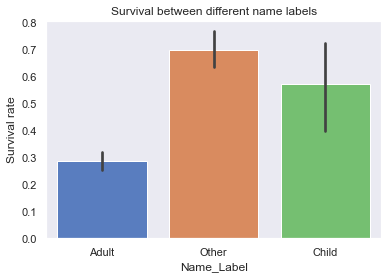

In [34]:
sns.barplot(x='Name_Label', y='Survived', data=x_train_obs)
plt.ylabel('Survival rate')
plt.title('Survival between different name labels')
plt.show()

#### As we can see, this graph depicts survival among ages and sex combined. Females (Other) survive more and children as well; most of the passengers in Adult are males

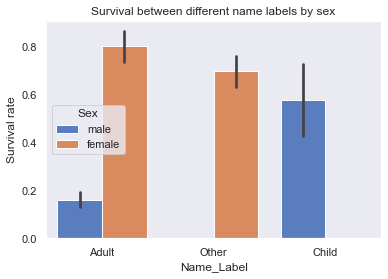

In [35]:
sns.barplot(x='Name_Label', y='Survived', data=x_train_obs, hue='Sex')
plt.ylabel('Survival rate')
plt.title('Survival between different name labels by sex')
plt.show()

In [36]:
x_train_obs.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_Class',
       'Relatives', 'Fare_Label', 'Name_Label'],
      dtype='object')

             Pclass       Age  Relatives      Fare
Pclass     1.000000 -0.369226   0.065997 -0.549500
Age       -0.369226  1.000000  -0.301914  0.096067
Relatives  0.065997 -0.301914   1.000000  0.217138
Fare      -0.549500  0.096067   0.217138  1.000000


<AxesSubplot:>

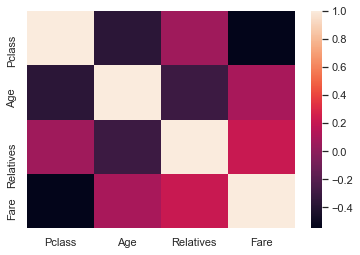

In [37]:
# Correlations matrix of the variables that will be used
print(x_train_obs[['Pclass','Age','Relatives','Fare']].corr())
sns.heatmap(x_train_obs[['Pclass','Age','Relatives','Fare']].corr())

#### Overall conclusions:
- Children survive more than adults and infants have a 100% survival rate. Determining children and infant ages is crucial
- Females have roughly 75% chance of surviving and most of the other variables survivability could be because they are females
- It seems like people who paid more (Pclass and Fare) are more likely to survive
- Passengers with 1-3 relatives aboard have a higher survival probability (Even though this could be because these are Females)
- The same goes for embarked
- Name variable will come in handy to pinpoint age
- The correlation between numerical variables are not high enough, therefore we don't assume that that there exist variables that are explaining one another

## 3) Preprocessing
---

#### Dropping numerical and categorical variables that won't be used
#### Replacing variable embarked NaNs
#### Encoding variables
#### Replacing Age NaNs with iterative imputer

In [38]:
# Creating target variable y (Survived)
y_train = x_train[['Survived']]

In [39]:
y_train.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [40]:
# Name will be dropped because it will be replaced with Name_Label
x_train = x_train.drop(['Survived','PassengerId','SibSp','Parch','Name','Ticket','Cabin'],axis=1)
x_test = x_test.drop(['PassengerId','SibSp','Parch','Name','Ticket','Cabin'],axis=1)

In [41]:
get_info(x_test)

These are the vairables in your DataFrame: 
----------------------------------------------------- 

Numerical variables in DataFrame: 

Pclass variable has 0 missing values.
Age variable has 86 missing values.
Fare variable has 0 missing values.
Relatives variable has 0 missing values.


Categorical variables in DataFrame: 

Sex variable has 2 unique values and 0 missing values.
Embarked variable has 3 unique values and 0 missing values.
Name_Label variable has 3 unique values and 0 missing values.


#### x_test only needs to be encoded and have age NaNs replaced

In [42]:
# From the earlier countplot, we see that the most common embarkation port is port S. We will replace Embarked NaNs with this
x_train['Embarked']=x_train['Embarked'].replace(np.nan, 'S', regex=True)

In [43]:
get_info(x_train)

These are the vairables in your DataFrame: 
----------------------------------------------------- 

Numerical variables in DataFrame: 

Pclass variable has 0 missing values.
Age variable has 177 missing values.
Fare variable has 0 missing values.
Relatives variable has 0 missing values.


Categorical variables in DataFrame: 

Sex variable has 2 unique values and 0 missing values.
Embarked variable has 3 unique values and 0 missing values.
Name_Label variable has 3 unique values and 0 missing values.


In [44]:
# Encoding x_train and x_test variables
label_encoder = preprocessing.LabelEncoder()

cols_to_encode = ['Sex','Embarked','Name_Label']

for col in cols_to_encode:
    x_train[col]=label_encoder.fit_transform(x_train[col])
    x_test[col]=label_encoder.transform(x_test[col])
    print(label_encoder.classes_)

['female' 'male']
['C' 'Q' 'S']
['Adult' 'Child' 'Other']


In [45]:
x_train.head()

,Pclass,Sex,Age,Fare,Embarked,Relatives,Name_Label
0,3,1,22.0,7.2500,2,1,0
1,1,0,38.0,71.2833,0,1,0
2,3,0,26.0,7.9250,2,0,2
3,1,0,35.0,53.1000,2,1,0
4,3,1,35.0,8.0500,2,0,0


In [46]:
x_test.head()

,Pclass,Sex,Age,Fare,Embarked,Relatives,Name_Label
0,3,1,34.5,7.8292,1,0,0
1,3,0,47.0,7.0000,2,1,0
2,2,1,62.0,9.6875,1,0,0
3,3,1,27.0,8.6625,2,0,0
4,3,0,22.0,12.2875,2,2,0


#### Now that this is ready, we can impute age with simple imputer

In [47]:
#imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
imputer = IterativeImputer(missing_values=np.nan, random_state=0)
x_train_final = pd.DataFrame(imputer.fit_transform(x_train))
x_train_final.columns = x_train.columns
x_train_final.head()

,Pclass,Sex,Age,Fare,Embarked,Relatives,Name_Label
0,3.0,1.0,22.0,7.2500,2.0,1.0,0.0
1,1.0,0.0,38.0,71.2833,0.0,1.0,0.0
2,3.0,0.0,26.0,7.9250,2.0,0.0,2.0
3,1.0,0.0,35.0,53.1000,2.0,1.0,0.0
4,3.0,1.0,35.0,8.0500,2.0,0.0,0.0


In [48]:
x_test_final = pd.DataFrame(imputer.transform(x_test))
x_test_final.columns = x_test.columns
x_test_final.head()

,Pclass,Sex,Age,Fare,Embarked,Relatives,Name_Label
0,3.0,1.0,34.5,7.8292,1.0,0.0,0.0
1,3.0,0.0,47.0,7.0000,2.0,1.0,0.0
2,2.0,1.0,62.0,9.6875,1.0,0.0,0.0
3,3.0,1.0,27.0,8.6625,2.0,0.0,0.0
4,3.0,0.0,22.0,12.2875,2.0,2.0,0.0


In [49]:
x_train_final['Age'].values

array([22.        , 38.        , 26.        , 35.        , 35.        ,
       29.69911765, 54.        ,  2.        , 27.        , 14.        ,
        4.        , 58.        , 20.        , 39.        , 14.        ,
       55.        ,  2.        , 29.69911765, 31.        , 29.69911765,
       35.        , 34.        , 15.        , 28.        ,  8.        ,
       38.        , 29.69911765, 19.        , 29.69911765, 29.69911765,
       40.        , 29.69911765, 29.69911765, 66.        , 28.        ,
       42.        , 29.69911765, 21.        , 18.        , 14.        ,
       40.        , 27.        , 29.69911765,  3.        , 19.        ,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 18.        ,
        7.        , 21.        , 49.        , 29.        , 65.        ,
       29.69911765, 21.        , 28.5       ,  5.        , 11.        ,
       22.        , 38.        , 45.        ,  4.        , 29.69911765,
       29.69911765, 29.        , 19.        , 17.        , 26.  

#### There seem to be some negative values for age, these will be simply turned into positive values

In [50]:
def to_positive(row):
    return abs(row['Age'])

In [51]:
x_train_final['Age'] = x_train_final.apply(lambda row: to_positive(row), axis=1)
x_test_final['Age'] = x_test_final.apply(lambda row: to_positive(row), axis=1)

## 4) Modeling Phase
---

#### Logistic Regresison - Kaggle score: 76.32%

In [52]:
log_classifier = LogisticRegression(random_state = 0, max_iter=1000)
log_classifier.fit(x_train_final,y_train.values.ravel())
y_pred_log_final = log_classifier.predict(x_test_final)

In [53]:
y_pred_log_final = pd.DataFrame((y_pred_log_final.reshape(-1,1)))

In [54]:
# Concatenating the passengers and predictions
log_results = pd.concat([x_test_copy[['PassengerId']],y_pred_log_final],axis=1)
log_results.head()

,PassengerId,0
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [55]:
log_results.to_csv('Multiple_Logistic_Regression.csv')

#### K-Nearest Neighbors - Kaggle score: 64.1%

In [56]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(x_train_final,y_train.values.ravel())
y_pred_knn_final = knn_classifier.predict(x_test_final)

In [57]:
y_pred_knn_final = pd.DataFrame((y_pred_knn_final.reshape(-1,1)))

In [58]:
knn_results = pd.concat([x_test_copy[['PassengerId']],y_pred_knn_final],axis=1)

In [59]:
knn_results.to_csv('K-Nearest Neighbors.csv')

#### Support Vector Machine - Kaggle score: 76.6%

In [60]:
svm_classifier = SVC(kernel = 'linear', random_state = 0)
svm_classifier.fit(x_train_final,y_train.values.ravel())
y_pred_svm = svm_classifier.predict(x_test_final)

In [61]:
y_pred_svm = pd.DataFrame((y_pred_svm.reshape(-1,1)))

In [62]:
svm_results = pd.concat([x_test_copy[['PassengerId']],y_pred_svm],axis=1)

In [63]:
svm_results.to_csv('Support_Vector_Machine.csv')

#### Kernel SVM - Kaggle score: 67%

In [64]:
ksvm_classifier = SVC(kernel = 'rbf', random_state = 0)
ksvm_classifier.fit(x_train_final,y_train.values.ravel())
y_pred_ksvm = ksvm_classifier.predict(x_test_final)

In [65]:
y_pred_ksvm = pd.DataFrame((y_pred_ksvm.reshape(-1,1)))

In [66]:
ksvm_results = pd.concat([x_test_copy[['PassengerId']],y_pred_ksvm],axis=1)

In [67]:
ksvm_results.to_csv('Kernel Support Vector Machine.csv')

#### Naive Bayes - Kaggle score: 75%

In [68]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train_final,y_train.values.ravel())
y_pred_nb = nb_classifier.predict(x_test_final)

In [69]:
y_pred_nb = pd.DataFrame((y_pred_nb.reshape(-1,1)))

In [70]:
nb_results = pd.concat([x_test_copy[['PassengerId']],y_pred_nb],axis=1)

In [71]:
nb_results.to_csv('Naive Bayes.csv')

#### Random Forest Classification - Kaggle score: 76%

In [72]:
rf_classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)
rf_classifier.fit(x_train_final,y_train.values.ravel())
y_pred_rf = rf_classifier.predict(x_test_final)

In [73]:
y_pred_rf = pd.DataFrame((y_pred_rf.reshape(-1,1)))

In [74]:
rf_results = pd.concat([x_test_copy[['PassengerId']],y_pred_rf],axis=1)

In [75]:
rf_results.to_csv('Random Forest.csv')

## Conclusion:
- The overall best models were RF, NB, SVM, and Logistic Regression
- I tried changing iterative imputer with simple imputer (simply filling in ages with the mean) and the difference wasn't much
- I still need to learn about techniques for further feature engineering and variable importance in the model
- Boosting the models for better performance might bring a better accuracy
- A more precise age NaN replacement method might have a better outcome on the models
- This is currently my 5th try at the titanic survivors model from Kaggle and there are a lot of things that I need to improve at. Feel free to give me feedback as I would love to learn how I can improve my variable observation, preprocessing, modeling, and coding skills

## References used for this proyect
#### Thank you for letting me learn so much about your models
- https://www.linkedin.com/pulse/what-i-learned-analyzing-famous-titanic-dateset-murilo-gustineli
- https://www.kaggle.com/kenjee/titanic-project-example
- https://github.com/murilogustineli/Titanic-Classification/blob/6a3d12691aa17bf7bdf6a2e68a8f4d15a23fa53e/Titanic%20Project.ipynb